# The Beatles Song Analysis EDA
![beatlesband](beatlesband.png)

The Beatles were an iconic English rock band formed in Liverpool in 1960, consisting of John Lennon, Paul McCartney, George Harrison, and Ringo Starr. They are widely regarded as one of the most influential bands in music history, revolutionizing the rock genre and popular culture.

Known for their groundbreaking albums like Sgt. Pepper's Lonely Hearts Club Band, Abbey Road, and Revolver, The Beatles blended diverse musical styles, innovative studio techniques, and timeless songwriting. Their hits include classics such as Hey Jude, Let It Be, Yesterday, and Come Together.

The Beatles' impact extends beyond music, influencing fashion, social movements, and global culture during the 1960s and beyond. Their legacy continues to inspire artists and fans worldwide.

This project focuses on analyzing and predicting the patterns of The Beatles over years using data sourced from Kaggle

## Data Injection/Data Importing
In this section, various libraries essential for the tasks mentioned are imported. These libraries will aid in data manipulation, analysis, and visualization. Additionally, the file containing the dataset to be analyzed is imported. The data will then be inspected to understand its structure, quality, and any necessary preprocessing steps for further analysis.

Importing the libraries needed

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('The Beatles songs dataset 285x45 v0.csv')

## Data Inspection

In [5]:
df.describe(include='all') #To get all the numerical descriptions about the data

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,...,Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)"
count,285,285,277,284,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,16.000000,49.000000,15.000000,49.000000,49.000000,49.000000,49.000000,50.00000,50.00000,42.000000
unique,285,285,14,23,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,spotify:track:2FDEHIMkjxFLzj688M2I3h,(You're So Square) Baby I Don't Care - Studio Jam,1963,The Beatles,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,61,34,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,50.087719,158.407018,4.961404,0.856140,121.348589,3.859649,...,4.125000,8.877551,3.600000,25.306122,25.959184,25.551020,25.693878,25.50000,25.50000,25.500000
std,NaN,NaN,NaN,NaN,14.415466,57.361001,3.387308,0.351565,28.525083,0.461115,...,1.746425,11.598550,2.097618,14.663168,14.358446,14.723933,14.666010,14.57738,14.57738,15.904057
min,NaN,NaN,NaN,NaN,22.000000,23.000000,0.000000,0.000000,59.004000,1.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000
25%,NaN,NaN,NaN,NaN,39.000000,128.000000,2.000000,1.000000,97.871000,4.000000,...,3.000000,1.000000,2.000000,13.000000,14.000000,13.000000,13.000000,13.25000,13.25000,11.250000
50%,NaN,NaN,NaN,NaN,52.000000,149.000000,4.000000,1.000000,123.227000,4.000000,...,3.500000,3.000000,3.000000,25.000000,26.000000,26.000000,26.000000,25.50000,25.50000,25.500000
75%,NaN,NaN,NaN,NaN,59.000000,175.000000,9.000000,1.000000,137.717000,4.000000,...,5.250000,12.000000,4.500000,38.000000,38.000000,38.000000,38.000000,37.75000,37.75000,39.750000


In [19]:
df.info() #To get all the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   URI                                  285 non-null    object 
 1   Title                                285 non-null    object 
 2   Year                                 277 non-null    object 
 3   Album                                284 non-null    object 
 4   Popularity                           285 non-null    float64
 5   Duration                             285 non-null    float64
 6   Key                                  285 non-null    float64
 7   Mode                                 285 non-null    float64
 8   Tempo                                285 non-null    float64
 9   Time_signature                       285 non-null    float64
 10  Valence                              285 non-null    float64
 11  Danceability                    

In [7]:
df.head() #To get the top 5 rows

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,...,Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)"
0,spotify:track:2FDEHIMkjxFLzj688M2I3h,(You're So Square) Baby I Don't Care - Studio Jam,NaN,The Beatles,29.0,43.0,9.0,1.0,112.173,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,spotify:track:2HvTGx5fzFGpHSyRNvXd9T,12-bar Original,1965,Anthology 2,31.0,175.0,9.0,1.0,122.678,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spotify:track:34dsKRJHIadrrNdCDtMwGn,A Beginning - Anthology 3 Version,NaN,Anthology 3,29.0,50.0,0.0,1.0,90.588,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,spotify:track:0hKRSZhUGEhKU6aNSPBACZ,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,65.0,335.0,4.0,0.0,163.219,4.0,...,NaN,NaN,NaN,NaN,1.0,1.0,2.0,18.0,1.0,1.0
4,spotify:track:5J2CHimS7dWYMImCHkEFaJ,A Hard Day's Night,1964,A Hard Day's Night,71.0,152.0,0.0,1.0,138.514,4.0,...,3.0,1.0,2.0,8.0,18.0,11.0,19.0,19.0,15.0,41.0


## Data Cleaning
Data cleaning is done to ensures datasets are accurate and ready for analysis.


To Handle Missing Values: I imputed (fillna()) missing data.
To Remove Duplicates: Use .drop_duplicates() to eliminate redundant rows.

In [8]:
df.head()

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,...,Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)"
0,spotify:track:2FDEHIMkjxFLzj688M2I3h,(You're So Square) Baby I Don't Care - Studio Jam,NaN,The Beatles,29.0,43.0,9.0,1.0,112.173,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,spotify:track:2HvTGx5fzFGpHSyRNvXd9T,12-bar Original,1965,Anthology 2,31.0,175.0,9.0,1.0,122.678,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spotify:track:34dsKRJHIadrrNdCDtMwGn,A Beginning - Anthology 3 Version,NaN,Anthology 3,29.0,50.0,0.0,1.0,90.588,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,spotify:track:0hKRSZhUGEhKU6aNSPBACZ,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,65.0,335.0,4.0,0.0,163.219,4.0,...,NaN,NaN,NaN,NaN,1.0,1.0,2.0,18.0,1.0,1.0
4,spotify:track:5J2CHimS7dWYMImCHkEFaJ,A Hard Day's Night,1964,A Hard Day's Night,71.0,152.0,0.0,1.0,138.514,4.0,...,3.0,1.0,2.0,8.0,18.0,11.0,19.0,19.0,15.0,41.0


In [9]:
df.isnull().sum()

URI                                      0
Title                                    0
Year                                     8
Album                                    1
Popularity                               0
Duration                                 0
Key                                      0
Mode                                     0
Tempo                                    0
Time_signature                           0
Valence                                  0
Danceability                             0
Energy                                   0
Loudness                                 0
Acousticness                             0
Instrumentalness                         0
Liveness                                 0
Speechiness                              0
Album debut                             10
Other releases                          72
Single A side                          195
Single B side                          195
Single certification                   235
Genre      

In [12]:
#to check for inplicit null values 
for col in df.columns:
  print(col)
  print(df[col].value_counts())
  print('='*15)

URI
URI
spotify:track:2FDEHIMkjxFLzj688M2I3h    1
spotify:track:1h04XMpzGzmAudoI6VHBgA    1
spotify:track:5frMgt4jqRGJk3yMKfqOyl    1
spotify:track:48TNLcToLs8DWkdj5vYdiW    1
spotify:track:1FTCA6wQwulQFokDddKE68    1
                                       ..
spotify:track:1Q7gCIpOjIIU0bUKcGzrG4    1
spotify:track:7wJQXHwL3oOllX9iFFg3wJ    1
spotify:track:53PHRtl7ZP8gkiWiX4rm15    1
spotify:track:0MbM0vhV3WHEaIBzFezBbJ    1
spotify:track:1dxbAIfCASqv6jix2R1Taj    1
Name: count, Length: 285, dtype: int64
Title
Title
(You're So Square) Baby I Don't Care - Studio Jam    1
Penny Lane                                           1
Real Love                                            1
Rain                                                 1
Polythene Pam                                        1
                                                    ..
I Feel Fine                                          1
I Forgot to Remember to Forget                       1
I Got a Woman                          

#### Dealing with missing values

In [11]:
df['Year'].value_counts()

Year
1963         61
1968         42
1964         38
1965         36
1969         36
1967         25
1966         19
1962          9
1961          3
1960          3
1958          2
1977/1994     1
1970          1
1980/1995     1
Name: count, dtype: int64

In [12]:
df[df['Year'].isnull()]

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,...,Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)"
0,spotify:track:2FDEHIMkjxFLzj688M2I3h,(You're So Square) Baby I Don't Care - Studio Jam,NaN,The Beatles,29.0,43.0,9.0,1.0,112.173,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spotify:track:34dsKRJHIadrrNdCDtMwGn,A Beginning - Anthology 3 Version,NaN,Anthology 3,29.0,50.0,0.0,1.0,90.588,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,spotify:track:00fyPXxe2SCBHnFwEO9Eh1,Across the Universe - Take 2 / Anthology 2 Ver...,NaN,Anthology 2,35.0,212.0,2.0,1.0,79.377,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,spotify:track:2Qgak11t9BJHwkicG0WJQE,Besame Mucho,NaN,Anthology 1,45.0,157.0,11.0,0.0,76.146,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,spotify:track:5D6TY2nkWmC0fijXKuYQrm,Can You Take Me Back? - Take 1,NaN,The Beatles,30.0,142.0,5.0,1.0,79.355,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,spotify:track:0cyR03TLxoLceHKWs7UDDM,How Do You Do It?,NaN,Anthology 1,34.0,117.0,7.0,1.0,136.596,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,spotify:track:2yRHcIxk1tQp2Yb4CiCnxT,Los Paranoias - Studio Jam,NaN,The Beatles,27.0,238.0,0.0,1.0,163.524,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,spotify:track:1j8M18rzGenrxvrbHNp8Aj,"The Hippy Hippy Shake - Live at the Bbc for ""p...",NaN,Live At The BBC,29.0,110.0,2.0,1.0,133.737,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#to get the mode year
    
mode= df['Year'].mode().iloc[0]
mode

'1963'

In [14]:
#filling with the mode
df['Year'] = df['Year'].fillna(mode)  
df['Year'].isnull().sum()

0

In [15]:
#to get the sum of the null values in the covered by column
df['Covered by'].isnull().sum()

103

In [16]:
#to fill the null values in the covered by column with the mean
df['Covered by'].fillna(df['Covered by'].mean())

0      11.5
1      11.5
2      11.5
3      27.0
4      35.0
       ... 
280     2.0
281    21.0
282    11.5
283    11.5
284     1.0
Name: Covered by, Length: 285, dtype: float64

In [17]:
#to fill the null values in the Other releases column with the median
df['Other releases'].fillna(df['Other releases'].median())

0      13.0
1      13.0
2      13.0
3      12.0
4      35.0
       ... 
280     6.0
281    12.0
282     2.0
283    13.0
284    13.0
Name: Other releases, Length: 285, dtype: float64

In [18]:
df['Other releases'].isnull().sum()

72

In [19]:
df['Lead vocal(s)'].dropna(inplace=True)

## Data Analysis & Visualization

This part of the project focuses on exploring and answering key questions using data analysis and visualization techniques. The process involves:
Exploratory Data Analysis (EDA):

Investigating patterns, relationships, and trends in the data using descriptive statistics.
Visualization:

Creating insightful visualizations (e.g., bar charts, scatter plots, line graphs) to represent findings and answer specific questions effectively.
Key Insights:

Highlighting trends, correlations, or anomalies relevant to the questions posed.

### Question 1
What are the most popular Beatles albums based on average song popularity?

In [21]:
album_pop_mean = df.groupby('Album', as_index=False)['Popularity'].mean().sort_values(by='Popularity', ascending=False)
album_pop_mean

,Album,Popularity
1,Abbey Road,63.529412
18,Rubber Soul,62.357143
11,Magical Mystery Tour,60.727273
16,Revolver,60.357143
8,Let It Be,60.083333
7,Help!,60.071429
19,Sgt. Pepper's Lonely Hearts Club Band,59.692308
15,Please Please Me,59.000000
0,A Hard Day's Night,58.307692
21,With the Beatles,54.428571


Abbey Road is the most popular song with a popularity of 63.5

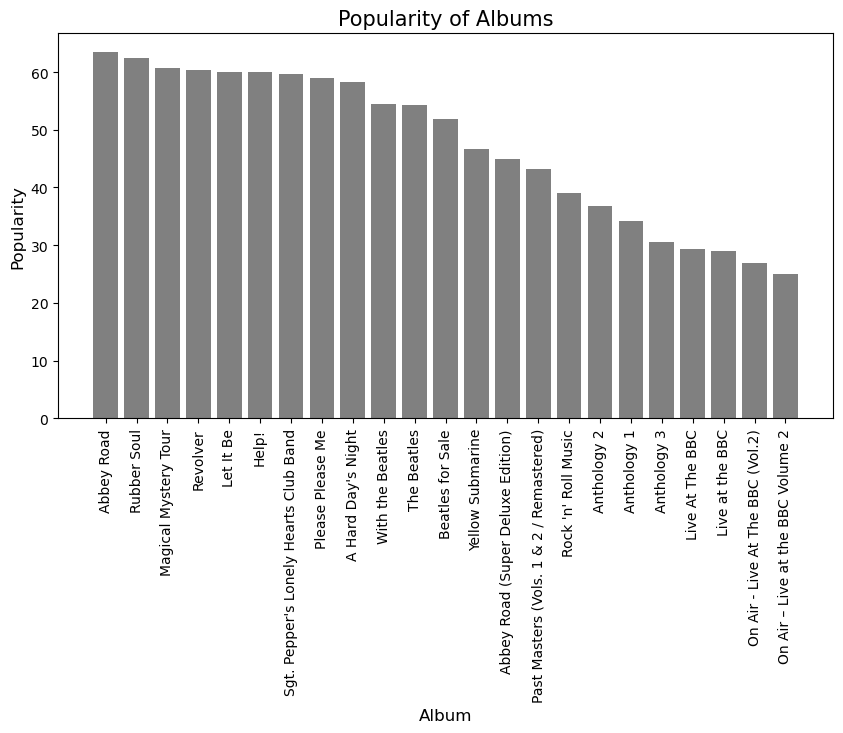

In [22]:
plt.figure(figsize=(10, 5))
plt.bar(album_pop_mean['Album'], album_pop_mean['Popularity'], color='gray')
plt.title('Popularity of Albums', fontsize=15)
plt.xlabel('Album', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(rotation=90)
plt.show()


### Question 2
How many songs were released each year?

In [23]:
song_per_year = df.groupby('Year', as_index=False)['Title'].count()
song_per_year

,Year,Title
0,1958,2
1,1960,3
2,1961,3
3,1962,9
4,1963,69
5,1964,38
6,1965,36
7,1966,19
8,1967,25
9,1968,42


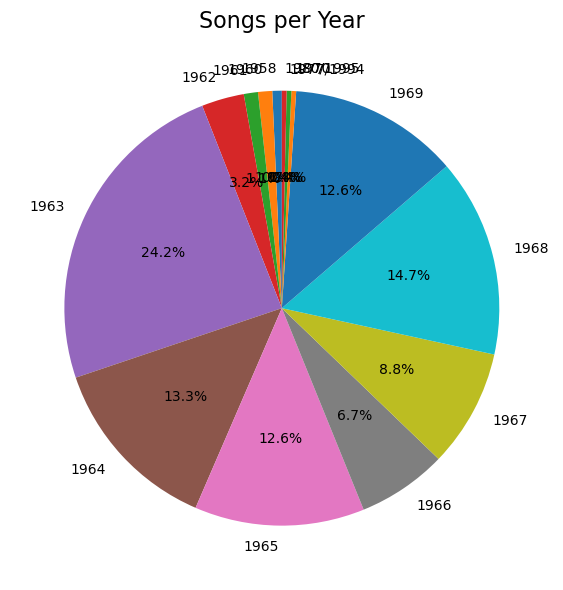

In [25]:
plt.figure(figsize=(10, 6))
plt.pie(song_per_year['Title'], labels=song_per_year['Year'], autopct='%1.1f%%', startangle=90)
plt.title('Songs per Year', fontsize=16)
plt.tight_layout()
plt.show()

### Question 3
Is there a relationship between a song's tempo and its popularity?

In [20]:
Tempo_Pop_corr = df[['Tempo', 'Popularity']].corr()
Tempo_Pop_corr

,Tempo,Popularity
Tempo,1.000000,0.064386
Popularity,0.064386,1.000000


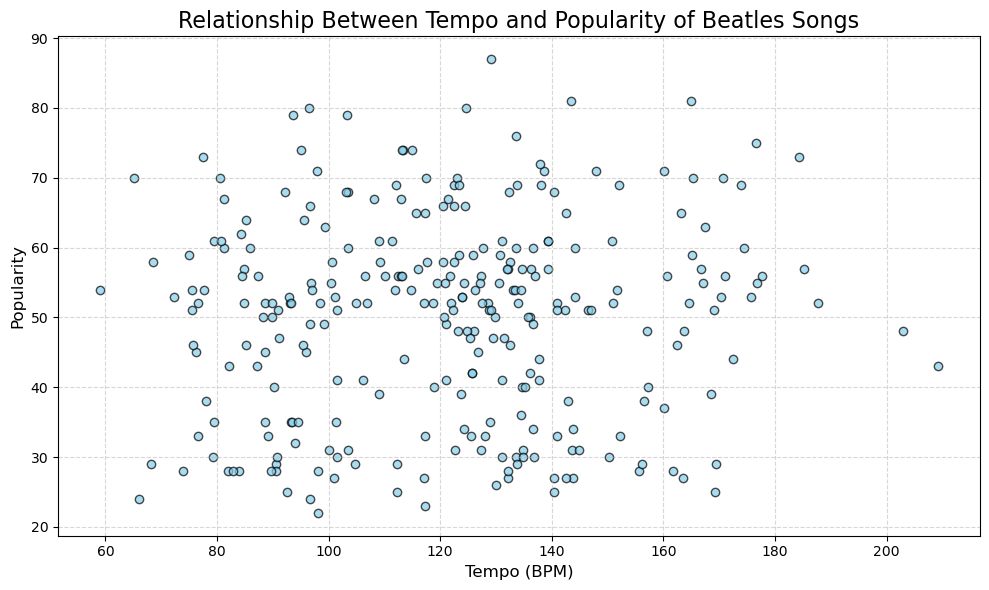

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tempo'], df['Popularity'], color='skyblue', edgecolor='k', alpha=0.7)
plt.title("Relationship Between Tempo and Popularity of Beatles Songs", fontsize=16)
plt.xlabel("Tempo (BPM)", fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

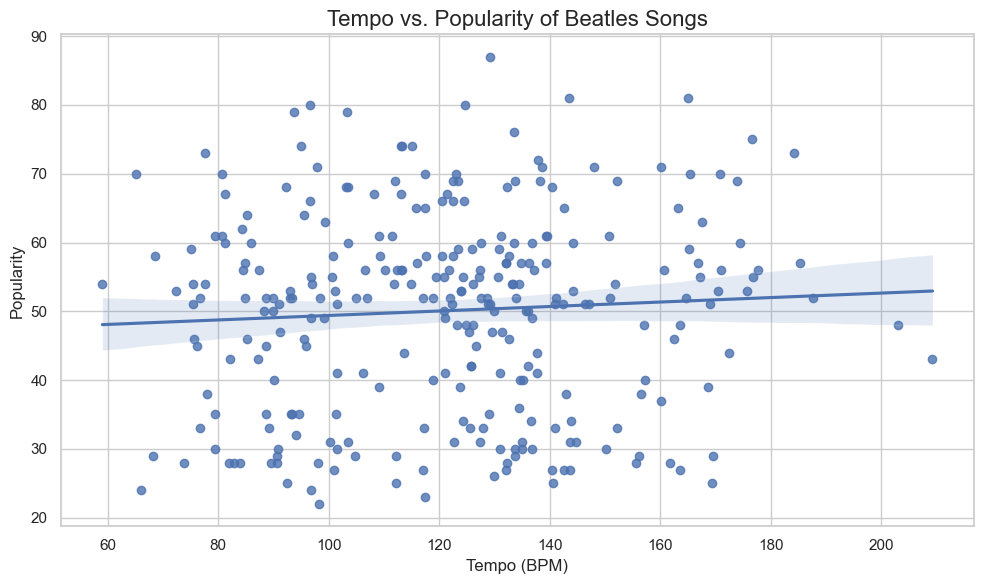

In [22]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create scatter plot with regression line
sns.regplot(x='Tempo', y='Popularity', data=df)

plt.title("Tempo vs. Popularity of Beatles Songs", fontsize=16)
plt.xlabel("Tempo (BPM)", fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.tight_layout()
plt.show()

### Question 4
What is the trend of average song popularity over the years?

In [70]:
song_polurb = df.groupby('Year', as_index=False)['Popularity'].mean()
song_polurb

,Year,Popularity
0,1958,39.500000
1,1960,29.666667
2,1961,35.666667
3,1962,44.888889
4,1963,40.101449
5,1964,49.500000
6,1965,56.222222
7,1966,60.157895
8,1967,56.400000
9,1968,52.595238


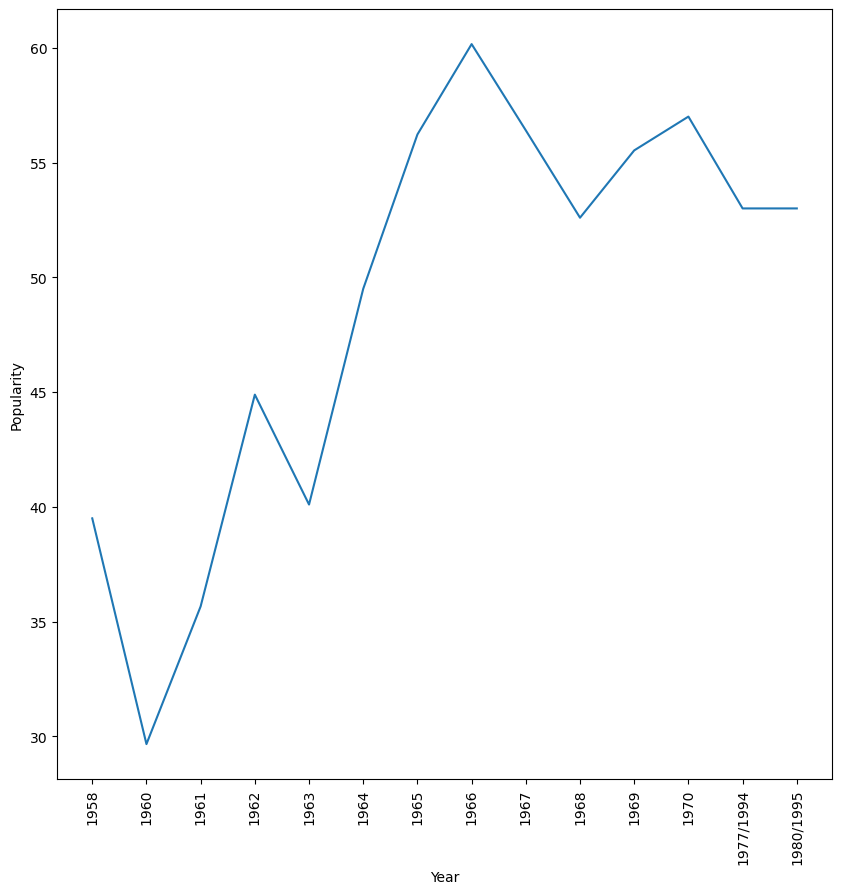

In [71]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='Year', y='Popularity', data=song_polurb)
plt.xticks(rotation=90)
plt.show()


This is a residual trend

### Question 5
What factors (e.g., tempo, energy, loudness) correlate most with a song's popularity?

In [74]:
pop_cor = df[['Tempo', 'Energy', 'Popularity', 'Loudness', 'Danceability', 'Acousticness', 'Speechiness', 'Liveness', 'Valence']].corr()

pop_cor

,Tempo,Energy,Popularity,Loudness,Danceability,Acousticness,Speechiness,Liveness,Valence
Tempo,1.000000,0.157287,0.064386,0.109459,-0.170923,-0.056032,0.130494,-0.096343,0.087579
Energy,0.157287,1.000000,-0.205986,0.672664,-0.078227,-0.416704,0.159515,0.289637,0.421059
Popularity,0.064386,-0.205986,1.000000,0.041945,-0.051430,-0.157694,-0.153949,-0.089184,-0.241653
Loudness,0.109459,0.672664,0.041945,1.000000,-0.057950,-0.345025,-0.084202,0.123929,0.336781
Danceability,-0.170923,-0.078227,-0.051430,-0.057950,1.000000,0.074796,-0.135945,-0.101440,0.393116
Acousticness,-0.056032,-0.416704,-0.157694,-0.345025,0.074796,1.000000,-0.040291,-0.003544,-0.056421
Speechiness,0.130494,0.159515,-0.153949,-0.084202,-0.135945,-0.040291,1.000000,0.223878,-0.104534
Liveness,-0.096343,0.289637,-0.089184,0.123929,-0.101440,-0.003544,0.223878,1.000000,-0.015947
Valence,0.087579,0.421059,-0.241653,0.336781,0.393116,-0.056421,-0.104534,-0.015947,1.000000


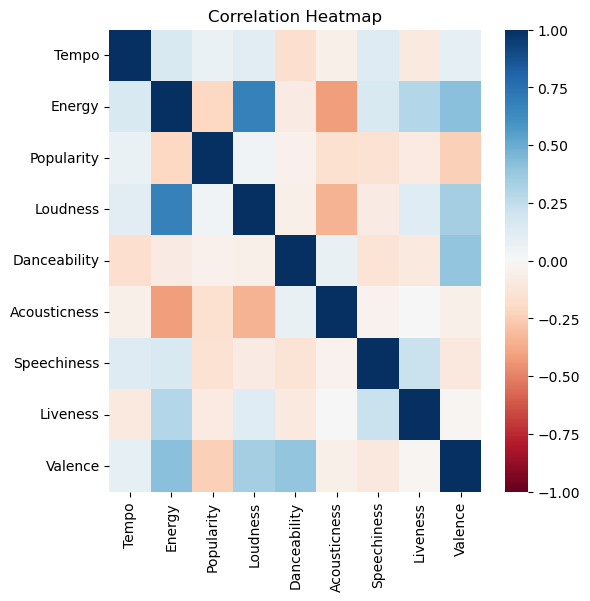

In [75]:
plt.figure(figsize=(6, 6))
sns.heatmap(pop_cor, cmap='RdBu', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Question 6
Which songwriter contributed to the most popular songs?

In [45]:
df.sort_values(by = 'Popularity', ascending = False).head()[['Popularity','Songwriter(s)']]

,Popularity,Songwriter(s)
90,87.0,Harrison
146,81.0,McCartney
43,81.0,Lennon
254,80.0,"Medley, Russell"
272,80.0,McCartney


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   URI                                  285 non-null    object 
 1   Title                                285 non-null    object 
 2   Year                                 285 non-null    object 
 3   Album                                284 non-null    object 
 4   Popularity                           285 non-null    float64
 5   Duration                             285 non-null    float64
 6   Key                                  285 non-null    float64
 7   Mode                                 285 non-null    float64
 8   Tempo                                285 non-null    float64
 9   Time_signature                       285 non-null    float64
 10  Valence                              285 non-null    float64
 11  Danceability                    

### Question 7
Do songs with certain moods or themes perform better in terms of popularity?

In [50]:
moods_themes = df.groupby(['Moods','Themes'], as_index = False)['Popularity'].mean()
moods_themes.sort_values(by = 'Popularity', ascending = False)

,Moods,Themes,Popularity
79,Bright Cheerful Happy Springlike Summery Sweet...,"Day Driving, Spring, Summer, The Great Outdoors",87.0
108,Calm/Peaceful Lush Poignant Refined Reflective...,"Comfort, Reflection, Christmas, In Love, Joy, ...",81.0
62,Bittersweet Earnest Plaintive Poignant Reflect...,"Breakup, Feeling Blue, Heartache",80.0
57,Autumnal Intimate Poignant Reflective Wistful ...,"Introspection, Reflection, Reminiscing, Reunion",79.0
28,Amiable/Good-Natured Delicate Earnest Gentle I...,Freedom,79.0
...,...,...,...
40,Amiable/Good-Natured Swaggering Bright Gritty ...,"Cool & Cocky, Guys Night Out, In Love, Partying",25.0
83,Bright Energetic Bravado Searching Gutsy Summe...,"Day Driving, Freedom, Guys Night Out, Hanging Out",24.0
152,Gritty Passionate Gutsy Raucous Rollicking Rou...,"Cool & Cocky, Guys Night Out, Partying, Sex",24.0
34,Amiable/Good-Natured Innocent Romantic Bright ...,"Affection/Fondness, In Love, New Love",23.0


### Question 8
Which genres or styles are associated with higher popularity?

In [54]:
df.sort_values(by = 'Popularity', ascending = False).head()[['Styles','Genre', 'Popularity', 'Title']]

,Styles,Genre,Popularity,Title
90,"Album Rock, Contemporary Pop/Rock, Early Pop/Rock","Folk Pop, Pop/Rock",87.0,Here Comes the Sun
146,"Album Rock, Contemporary Pop/Rock, Early Pop/R...","Rock, Gospel, Pop/Rock",81.0,Let It Be
43,"Album Rock, Contemporary Pop/Rock, Early Pop/R...","Blues Rock, Pop/Rock",81.0,Come Together
254,"British Invasion, Contemporary Pop/Rock, Early...","Rock and Roll, R&B, Pop/Rock",80.0,Twist and Shout
272,"British Invasion, Contemporary Pop/Rock, Early...","Baroque Pop, Pop/Rock",80.0,Yesterday


### Question 9
How does danceability vary across different albums?

In [31]:
danceability_albums = df.groupby('Album', as_index = False)['Danceability'].mean()

danceability = danceability_albums.sort_values(by = 'Danceability', ascending = False) 
danceability

,Album,Danceability
0,A Hard Day's Night,0.601462
10,Live at the BBC,0.596519
6,Beatles for Sale,0.592286
18,Rubber Soul,0.587786
12,On Air - Live At The BBC (Vol.2),0.579000
2,Abbey Road (Super Deluxe Edition),0.556000
15,Please Please Me,0.547929
7,Help!,0.528000
9,Live At The BBC,0.527333
8,Let It Be,0.520417


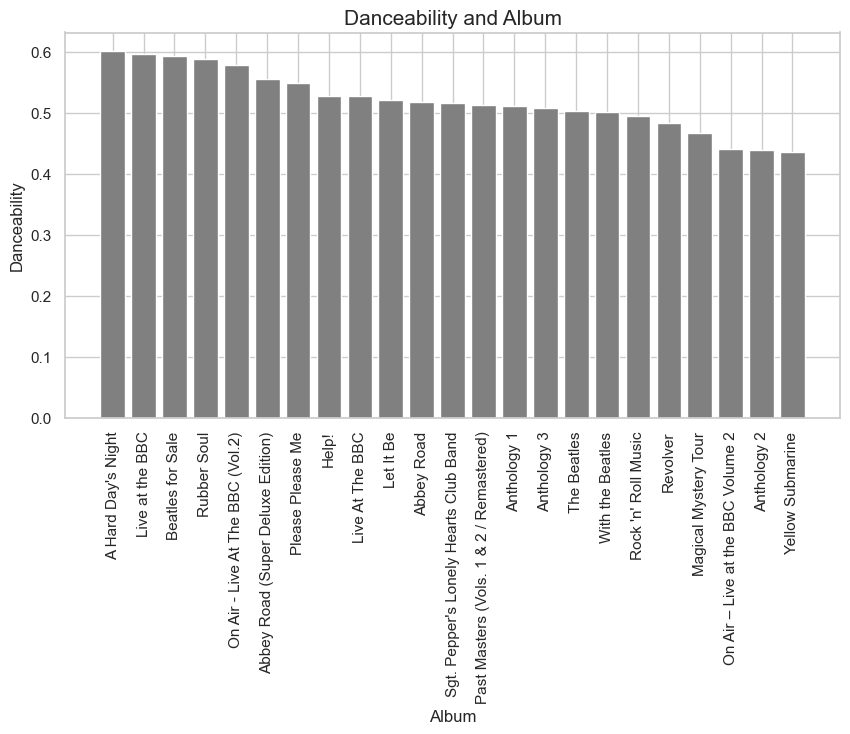

In [32]:
plt.figure(figsize=(10, 5))
plt.bar(danceability['Album'], danceability['Danceability'], color='gray')
plt.title('Danceability and Album', fontsize=15)
plt.xlabel('Album', fontsize=12)
plt.ylabel('Danceability', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Question 10 
How does popularity vary across different albums?

In [33]:
popularity_albums = df.groupby('Album', as_index = False)['Popularity'].mean()

popularity = popularity_albums.sort_values(by = 'Popularity', ascending = False)
popularity 

,Album,Popularity
1,Abbey Road,63.529412
18,Rubber Soul,62.357143
11,Magical Mystery Tour,60.727273
16,Revolver,60.357143
8,Let It Be,60.083333
7,Help!,60.071429
19,Sgt. Pepper's Lonely Hearts Club Band,59.692308
15,Please Please Me,59.000000
0,A Hard Day's Night,58.307692
21,With the Beatles,54.428571


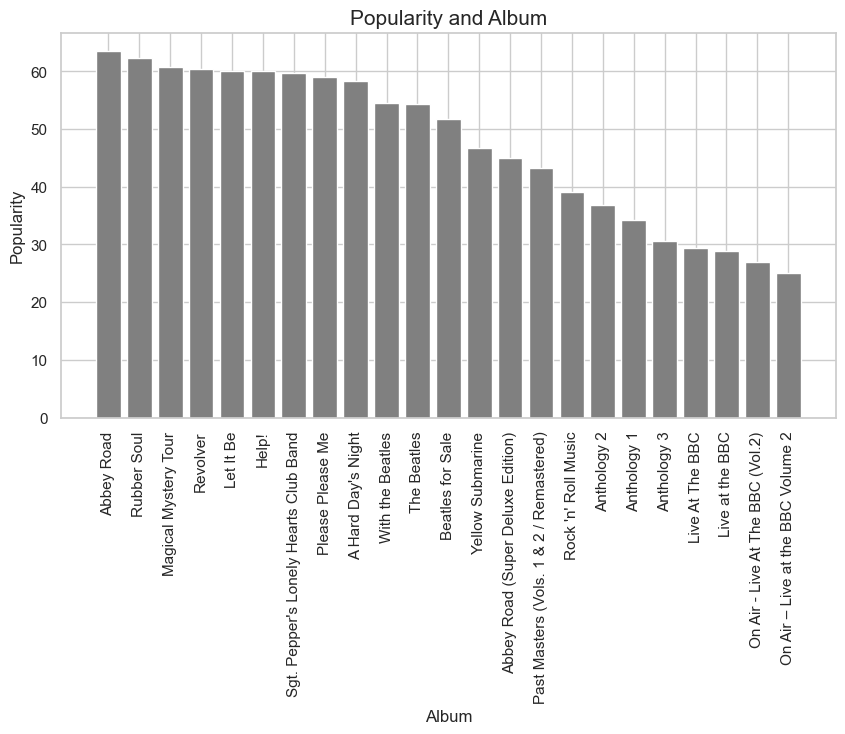

In [34]:
plt.figure(figsize=(10, 5))
plt.bar(popularity['Album'], popularity['Popularity'], color='gray')
plt.title('Popularity and Album', fontsize=15)
plt.xlabel('Album', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Question 11
How does danceability and popularity vary across albums

In [35]:
danceability_albums_popularity_albums = danceability.merge(popularity, on=['Album'], how='outer', suffixes=('Dance', 'Popular')) 
danceability_albums_popularity_albums

,Album,Danceability,Popularity
0,A Hard Day's Night,0.601462,58.307692
1,Abbey Road,0.518000,63.529412
2,Abbey Road (Super Deluxe Edition),0.556000,45.000000
3,Anthology 1,0.510429,34.190476
4,Anthology 2,0.439400,36.800000
5,Anthology 3,0.508200,30.600000
6,Beatles for Sale,0.592286,51.785714
7,Help!,0.528000,60.071429
8,Let It Be,0.520417,60.083333
9,Live At The BBC,0.527333,29.333333


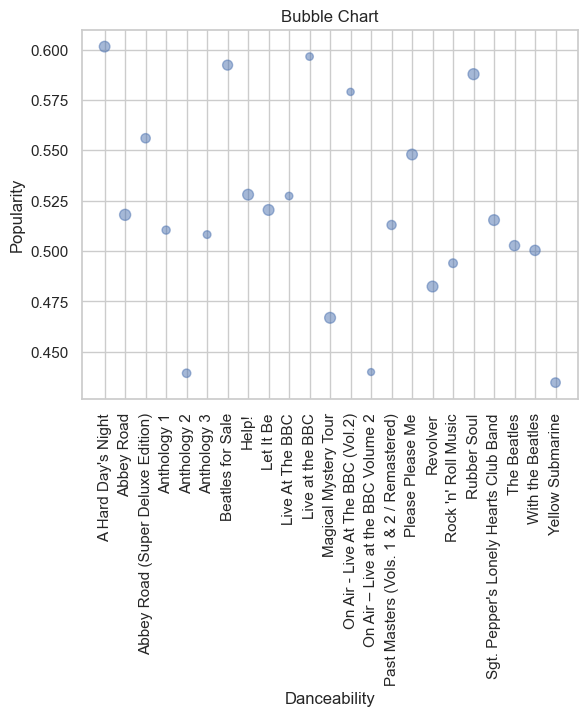

In [41]:
import matplotlib.pyplot as plt

plt.scatter(danceability_albums_popularity_albums['Album'], danceability_albums_popularity_albums['Danceability'], s= danceability_albums_popularity_albums['Popularity'], alpha=0.5)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Bubble Chart')
plt.xticks(rotation=90)
plt.show()


There is no clear variations between popularity and  dabceability since albums with high popularity do not necessarily have high danceability